# Objetivo

**Importacion y carga del DataSet**





In [1]:
import requests
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import plotly.graph_objects as go
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=1000000000"
df = pd.read_json(url)

**Descripcion del DataSet**

Para el problema planteado se toman los datos disponibles en la pagina web www.datos.gov.co. El DataSet seleccionado corresponde a los casos positivos de Coronavirus COVID-19 en Colombia reportados por el Instituto Nacional de Salud (INS).

In [3]:
#dummies
df = pd.concat([df,pd.get_dummies(df['atenci_n'])],axis=1).drop(['atenci_n'],axis=1)

In [4]:
#dfEstado.rename(columns={'Medellín': 'Medellin','Bogotá D.C.':'Bogota','Cartagena de Indias':'Cartagena'}, inplace=True)
df = df.replace(['Medellín'],'Medellin')
df = df.replace(['Bogotá D.C.'],'Bogota')
df = df.replace(['Cartagena de Indias'],'Cartagena')

In [21]:
#Modificacion de formato fecha web y fecha recuperacion
df['fecha_reporte_web'] = pd.to_datetime(df['fecha_reporte_web'])
df['fecha_recuperado'] = pd.to_datetime(df['fecha_recuperado'])
df['fecha_de_muerte'] = pd.to_datetime(df['fecha_de_muerte'])
df['fecha_de_notificaci_n'] = pd.to_datetime(df['fecha_de_notificaci_n'])
df['fecha_diagnostico'] = pd.to_datetime(df['fecha_diagnostico'])

In [22]:
dfNuevosCasos = df.groupby(['fecha_reporte_web','ciudad_de_ubicaci_n','departamento','edad', 'sexo','estado'])[['Casa','Fallecido','Hospital','Hospital UCI','Recuperado','N/A']].sum().reset_index()
dfNuevosCasos['Fecha']=dfNuevosCasos['fecha_reporte_web']
dfNuevosCasos.head()

,fecha_reporte_web,ciudad_de_ubicaci_n,departamento,edad,sexo,estado,Casa,Fallecido,Hospital,Hospital UCI,Recuperado,N/A,Fecha
0,2020-03-06,Bogota,Bogota,19,F,Leve,0,0,0,0,1,0,2020-03-06
1,2020-03-09,Guadalajara de Buga,Valle del Cauca,34,M,Leve,0,0,0,0,1,0,2020-03-09
2,2020-03-09,Medellin,Antioquia,50,F,Leve,0,0,0,0,1,0,2020-03-09
3,2020-03-11,Bogota,Bogota,22,F,Leve,0,0,0,0,1,0,2020-03-11
4,2020-03-11,Bogota,Bogota,28,F,Leve,0,0,0,0,1,0,2020-03-11


In [23]:
dfFallecidos = df.groupby(['fecha_de_muerte','ciudad_de_ubicaci_n','departamento','edad', 'sexo','estado'])[['Casa','Fallecido','Hospital','Hospital UCI','Recuperado','N/A']].sum().reset_index()
dfFallecidos['Fecha']=dfFallecidos['fecha_de_muerte']
dfFallecidos.head()

,fecha_de_muerte,ciudad_de_ubicaci_n,departamento,edad,sexo,estado,Casa,Fallecido,Hospital,Hospital UCI,Recuperado,N/A,Fecha
0,2020-03-16,Cartagena,Cartagena D.T. y C.,58,M,Fallecido,0,1,0,0,0,0,2020-03-16
1,2020-03-22,Yumbo,Valle del Cauca,70,F,Fallecido,0,1,0,0,0,0,2020-03-22
2,2020-03-23,Santa Marta,Santa Marta D.T. y C.,88,M,Fallecido,0,1,0,0,0,0,2020-03-23
3,2020-03-24,Popayán,Cauca,3,F,Fallecido,0,1,0,0,0,0,2020-03-24
4,2020-03-25,Bogota,Bogota,76,M,Fallecido,0,1,0,0,0,0,2020-03-25


In [24]:
dfRecuperados = df.groupby(['fecha_recuperado','ciudad_de_ubicaci_n','departamento','edad', 'sexo','estado'])[['Casa','Fallecido','Hospital','Hospital UCI','Recuperado','N/A']].sum().reset_index()
dfRecuperados['Fecha']=dfRecuperados['fecha_recuperado']
dfRecuperados.head()

,fecha_recuperado,ciudad_de_ubicaci_n,departamento,edad,sexo,estado,Casa,Fallecido,Hospital,Hospital UCI,Recuperado,N/A,Fecha
0,2020-03-13,Bogota,Bogota,19,F,Leve,0,0,0,0,1,0,2020-03-13
1,2020-03-14,Bogota,Bogota,73,F,Leve,0,0,0,0,1,0,2020-03-14
2,2020-03-15,Medellin,Antioquia,50,F,Leve,0,0,0,0,1,0,2020-03-15
3,2020-03-17,Cartagena,Cartagena D.T. y C.,85,F,Leve,0,0,0,0,1,0,2020-03-17
4,2020-03-19,Guadalajara de Buga,Valle del Cauca,34,M,Leve,0,0,0,0,1,0,2020-03-19


In [25]:
dfNuevosCasos['Contagios'] = dfNuevosCasos['Casa']+dfNuevosCasos['Fallecido']+dfNuevosCasos['Hospital']+dfNuevosCasos['Hospital UCI']+dfNuevosCasos['Recuperado']#+df1['N/A']
dfFallecidos['Muertes'] = dfFallecidos['Fallecido']#+df1['Recuperado']#+df1['N/A']
dfRecuperados['Recuperados'] = dfRecuperados['Recuperado']#+df1['N/A']

In [26]:
dfContagiosM=dfNuevosCasos.query('ciudad_de_ubicaci_n=="Medellin"').groupby(['Fecha','ciudad_de_ubicaci_n'])['Contagios'].sum().reset_index()
dfContagiosM['Confirmados'] = dfContagiosM['Contagios'].cumsum()
dfContagiosB=dfNuevosCasos.query('ciudad_de_ubicaci_n=="Bogota"').groupby(['Fecha','ciudad_de_ubicaci_n'])['Contagios'].sum().reset_index()
dfContagiosB['Confirmados'] = dfContagiosB['Contagios'].cumsum()
dfContagiosCr=dfNuevosCasos.query('ciudad_de_ubicaci_n=="Cartagena"').groupby(['Fecha','ciudad_de_ubicaci_n'])['Contagios'].sum().reset_index()
dfContagiosCr['Confirmados'] = dfContagiosCr['Contagios'].cumsum()
dfContagiosC=dfNuevosCasos.query('ciudad_de_ubicaci_n=="Cali"').groupby(['Fecha','ciudad_de_ubicaci_n'])['Contagios'].sum().reset_index()
dfContagiosC['Confirmados'] = dfContagiosC['Contagios'].cumsum()
dfContagiosBr=dfNuevosCasos.query('ciudad_de_ubicaci_n=="Barranquilla"').groupby(['Fecha','ciudad_de_ubicaci_n'])['Contagios'].sum().reset_index()
dfContagiosBr['Confirmados'] = dfContagiosBr['Contagios'].cumsum()

In [27]:
dfContagios=dfContagiosM.append([dfContagiosB, dfContagiosCr,dfContagiosC,dfContagiosBr])

In [28]:
dfContagios.reset_index()

,index,Fecha,ciudad_de_ubicaci_n,Contagios,Confirmados
0,0,2020-03-09,Medellin,1.0,1.0
1,1,2020-03-11,Medellin,2.0,3.0
2,2,2020-03-14,Medellin,2.0,5.0
3,3,2020-03-15,Medellin,1.0,6.0
4,4,2020-03-19,Medellin,3.0,9.0
...,...,...,...,...,...
851,160,2020-09-01,Barranquilla,88.0,36082.0
852,161,2020-09-02,Barranquilla,57.0,36139.0
853,162,2020-09-03,Barranquilla,200.0,36339.0
854,163,2020-09-04,Barranquilla,77.0,36416.0


In [123]:
dfEstado=pd.concat([dfNuevosCasos, dfFallecidos, dfRecuperados], axis=0)

In [30]:
dfEstado=dfEstado[dfEstado['ciudad_de_ubicaci_n'].isin(['Medellin', 'Bogota','Cartagena','Barranquilla','Cali']) ]
dfEstado = pd.concat([dfEstado,pd.get_dummies(dfEstado['ciudad_de_ubicaci_n'])],axis=1).drop(['ciudad_de_ubicaci_n'],axis=1)


In [31]:

dfContagiosFecha=dfEstado.groupby(['Fecha', 'Bogota', 'Medellin', 'Barranquilla', 'Cali','Cartagena'])['Contagios'].sum().reset_index()
dfFallecidosFecha=dfEstado.groupby(['Fecha','Bogota', 'Medellin', 'Barranquilla', 'Cali','Cartagena'])['Muertes'].sum().reset_index()
dfRecuperadosFecha=dfEstado.groupby(['Fecha','Bogota', 'Medellin', 'Barranquilla', 'Cali','Cartagena'])['Recuperados'].sum().reset_index()

<hr>

# 1. Modelos de serie->valor

## 1.1. Prediccion basada en Regresion Lineal

In [125]:
from sklearn.preprocessing import StandardScaler
import numpy as np


In [126]:
#5 dias atras para predecir el dia siguiente
serie = np.array(dfContagiosFecha.query('Medellin=="1"')['Contagios'].tolist())
step = 5
X_windowed = []
Y = []

for i in range(len(serie)-step):
  X_windowed.append(np.array([serie[i],serie[i+1], serie[i+2], serie[i+3], serie[i+4]]))
  Y.append(np.array(serie[i+step]))

X = np.array(X_windowed)
Y = np.array(Y)

In [127]:
seed = 5

np.random.seed(5)

random_index = np.random.permutation(len(X))

X_train = X[random_index[:int(0.7*len(serie))]]
Y_train = Y[random_index[:int(0.7*len(serie))]]

#X_train = X[:int(0.9*len(serie))]
#Y_train = Y[:int(0.9*len(serie))]

X_test = X[random_index[int(0.7*len(serie)):]]
Y_test = Y[random_index[int(0.7*len(serie)):]]
#X_test = X[random_index[int(0.9*len(serie)):]]
#Y_test = Y[random_index[int(0.9*len(serie)):]]

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

m = len(Y)

model=LinearRegression()
model.fit(X_train,Y_train)
#model.fit(X,Y)

Y_preds_test = model.predict(X_test)
error_medio_cuadrado = mean_squared_error(Y_test, Y_preds_test)
print("Error medio cuadrado del modelo: ", np.sqrt(error_medio_cuadrado))

Error medio cuadrado del modelo:  160.0359935727395


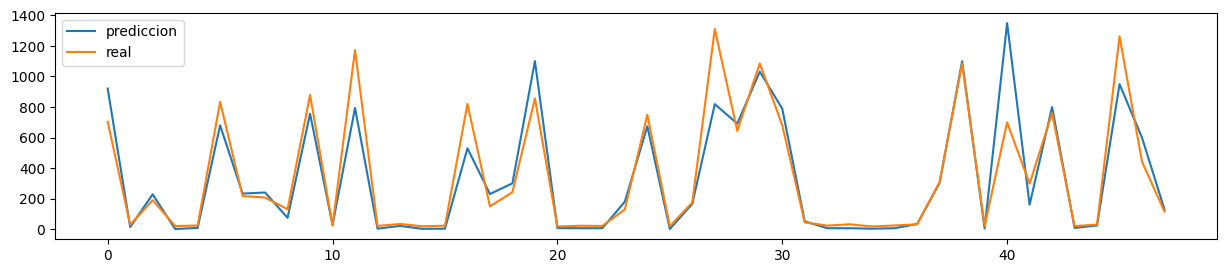

In [129]:
plt.figure(figsize=(15,3), dpi=100)
plt.plot(Y_test)
plt.plot(Y_preds_test)
plt.legend(['prediccion', 'real'])

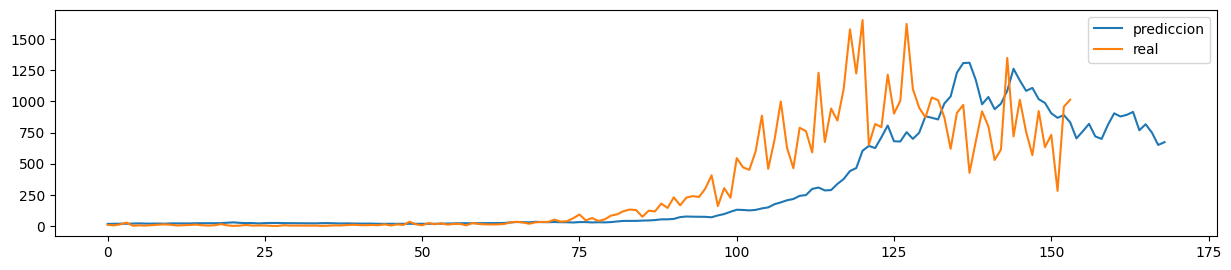

In [131]:
predicciones = model.predict(X)

plt.figure(figsize=(15,3), dpi=100)
plt.plot(predicciones)
plt.plot(serie[step+future:])
plt.legend(['prediccion', 'real'])

<hr>

## 1.2. Prediccion basada en Red Neuronal tipo MLP

In [132]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

from sklearn.preprocessing import StandardScaler

<hr>

# 2. Modelos Serie->Serie

In [133]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [134]:
#7 dias atras para predecir 7 dias hacia adelante en saltos de 7 para propositos de plotting

sub_df = dfContagiosFecha.query('Bogota == "1"')['Contagios']
serie = np.array(sub_df.tolist()).reshape([len(sub_df),1])

scaler = StandardScaler()
scaler.fit(serie)

serie = scaler.transform(serie).reshape([len(serie)])

step = 15
future = 15
X_windowed = []
Y_windowed = []

for i in range(0, len(serie)-(step+future), future):
  x_window = [serie[i+j] for j in range(step)]
  X_windowed.append(np.array(x_window))

  y_window = [serie[i+step+j] for j in range(future)]
  Y_windowed.append(np.array(y_window))

X_plot = np.array(X_windowed)
Y_plot = np.array(Y_windowed)

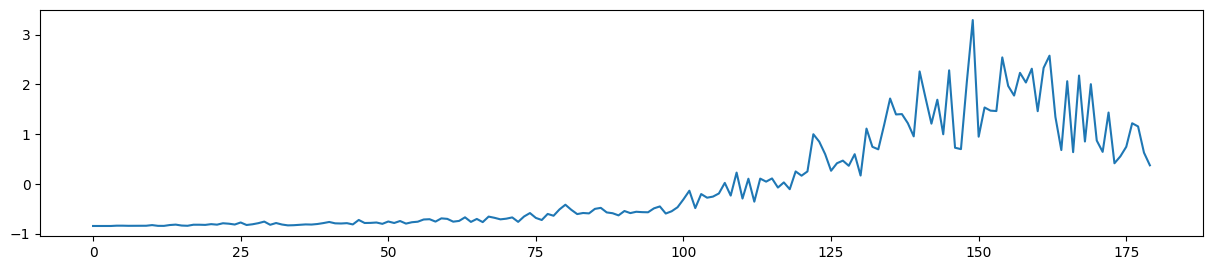

In [135]:
plt.figure(figsize=(15,3), dpi=100)
plt.plot(serie)

In [136]:
#7 dias atras para predecir 7 dias hacia adelante, de dia en dia para entrenamiento y prueba

sub_df = dfContagiosFecha.query('Bogota == "1"')['Contagios']
serie = np.array(sub_df.tolist()).reshape([len(sub_df),1])

scaler = StandardScaler()
scaler.fit(serie)

serie = scaler.transform(serie).reshape([len(serie)])

step = 15
future = 15
X_windowed = []
Y_windowed = []

for i in range(0, len(serie)-(step+future)):
  x_window = [serie[i+j] for j in range(step)]
  X_windowed.append(np.array(x_window))

  y_window = [serie[i+step+j] for j in range(future)]
  Y_windowed.append(np.array(y_window))
  
  #X_windowed.append(np.array([serie[i],serie[i+1], serie[i+2], serie[i+3], serie[i+4], serie[i+5], serie[i+6]]))
  #Y_windowed.append(np.array([serie[i+7],serie[i+8], serie[i+9], serie[i+10], serie[i+11], serie[i+12], serie[i+13]]))

X = np.array(X_windowed)
Y = np.array(Y_windowed)

In [137]:
seed = 5

np.random.seed(5)

train_ratio = 0.9

#random_index = np.random.permutation(len(X))
random_index = np.arange(len(X))

X_train = X[random_index[:int(train_ratio*len(X))]]
Y_train = Y[random_index[:int(train_ratio*len(Y))]]

X_test = X[random_index[int(train_ratio*len(X)):]]
Y_test = Y[random_index[int(train_ratio*len(Y)):]]

In [142]:
# Red neuronal
num_units = 7
model = Sequential()

model.add(Dense(units=num_units, input_shape=(step,), activation='sigmoid', use_bias=True)) #capa 1. La dimensionalidad de la entrada solo se define para la primera capa
#model.add(Dense(units=num_units, activation='relu', use_bias=True))
model.add(Dense(units=future, activation='linear', use_bias=True)) #capa 1

opt = RMSprop(lr=0.0001)
model.compile(optimizer=opt,
              loss='mse') # metricas complementarias

In [143]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_23 (Dense)             (None, 15)                120       
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


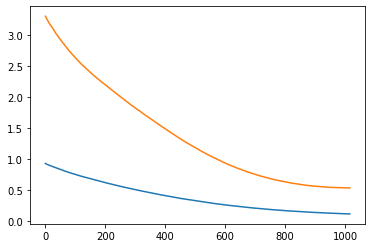

In [144]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train,Y_train, epochs=2000, verbose=0, validation_data=(X_test, Y_test), callbacks=[callback])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [145]:
Y_preds_test = model.predict(X_test)
error_medio_cuadrado = mean_squared_error(Y_test, Y_preds_test)
print("Error medio cuadrado del modelo: ", error_medio_cuadrado)

Error medio cuadrado del modelo:  0.5362589869314914


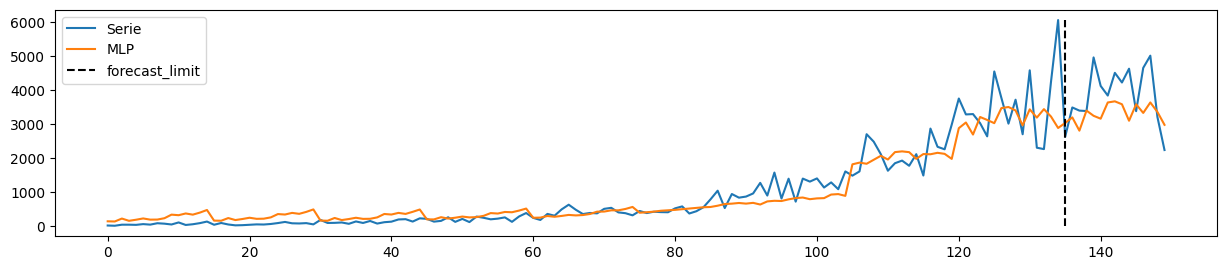

In [146]:
preds = model.predict(X_plot)

plt.figure(figsize=(15,3), dpi=100)

#Concatenamos las series generadas y la salida Y
concat_Y = []
for y in Y_plot:
  concat_Y += list(y)

concat_preds = []
for pred in preds:
  concat_preds += list(pred)

plt.plot(scaler.inverse_transform(concat_Y))
plt.plot(scaler.inverse_transform(concat_preds)) #red neuronal
plt.plot([train_ratio*len(concat_Y), train_ratio*len(concat_Y)],[0, np.max(scaler.inverse_transform(concat_Y))], 'k--')


plt.legend(['Serie', 'MLP', 'forecast_limit'])

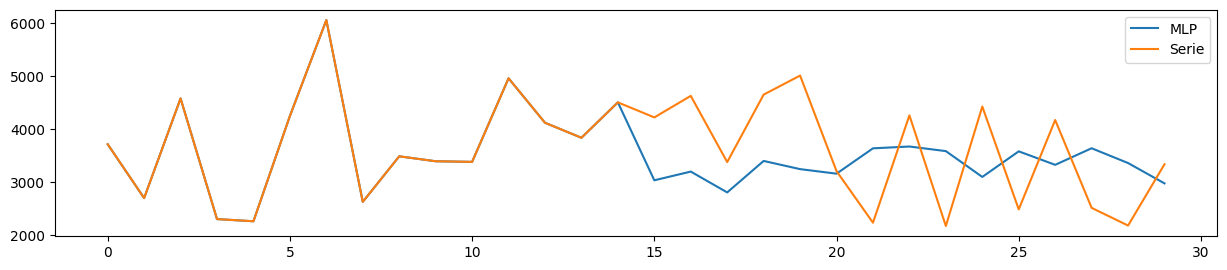

In [147]:
index = 8

siete_anteriores = np.array([X_test[index]])
preds = model.predict(siete_anteriores)

plt.figure(figsize=(15,3), dpi=100)

concat_preds = []
for pred in preds:
  concat_preds += list(pred)

plt.plot(scaler.inverse_transform(list(siete_anteriores.squeeze())+concat_preds)) #red neuronal
plt.plot(scaler.inverse_transform(list(siete_anteriores.squeeze())+list(Y_test[index]))) #red neuronal

plt.legend(['MLP', 'Serie'])

## 2.2. Prueba de modelo entrenado con una ciudad con forecast en otra

In [148]:
#7 dias atras para predecir 7 dias hacia adelante en saltos de 7 para propositos de plotting

sub_df = dfContagiosFecha.query('Cali == "1"')['Contagios']
serie = np.array(sub_df.tolist()).reshape([len(sub_df),1])

scaler = StandardScaler()
scaler.fit(serie)

serie = scaler.transform(serie).reshape([len(serie)])

step = 15
future = 15
X_windowed = []
Y_windowed = []

for i in range(0, len(serie)-(step+future), future):
  x_window = [serie[i+j] for j in range(step)]
  X_windowed.append(np.array(x_window))

  y_window = [serie[i+step+j] for j in range(future)]
  Y_windowed.append(np.array(y_window))

X_plot = np.array(X_windowed)
Y_plot = np.array(Y_windowed)

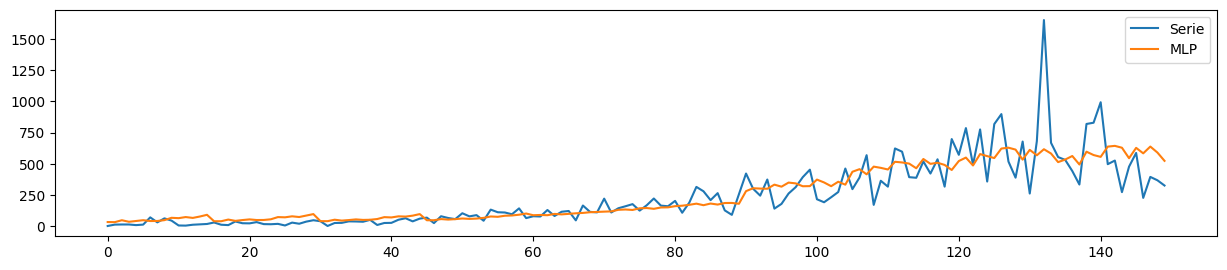

In [149]:
preds = model.predict(X_plot)

plt.figure(figsize=(15,3), dpi=100)

#Concatenamos las series generadas y la salida Y
concat_Y = []
for y in Y_plot:
  concat_Y += list(y)

concat_preds = []
for pred in preds:
  concat_preds += list(pred)

plt.plot(scaler.inverse_transform(concat_Y))
plt.plot(np.maximum(0, scaler.inverse_transform(concat_preds))) #maximum entre el valor y cero para evitar negativos

plt.legend(['Serie', 'MLP'])

In [150]:
error_medio_cuadrado = mean_squared_error(concat_Y[20:], concat_preds[20:])
print("Error medio cuadrado del modelo entrenado en Bogota y Forecast en Medellin: ", error_medio_cuadrado)

Error medio cuadrado del modelo entrenado en Bogota y Forecast en Medellin:  0.36775356604201836
